<a href="https://colab.research.google.com/github/drshahizan/Python_Tutorial/blob/main/big%20data/Assignment_big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group 4 Members:**
1. **GOO YE JUI A20EC0191** 
2. **KELVIN EE A20EC0195**

# Car Sales Dataset

In this project, we are going to do an exploratory data analysis of the car sales ads in Russia by region. We have found from https://www.kaggle.com/datasets/ekibee/car-sales-information?select=region25_en.csv. We will only use the dataset of region25_en.csv. The dataset is 310.82MB


The technique/tool used we used in this EDA such as:

pandas
scipy
numpy
scikit-learn
matplotlib.pyplot
seaborn

## Downloading the Dataset

**TODO** - 

1. **Create New API Token - It will download kaggle.json file on your machine.**

2. **Run the command needed to upload kaggle.json.**

3. **Make directory named kaggle and copy kaggle.json file there.**

4. **Change the permissions of the file.**

5. **Download the dataset chosen from kaggle using API command and list the files in the dataset.**

6. **Extract the dataset and read the .csv that you want.**

Let's begin by downloading the data, and listing the files within the dataset.

In [25]:
 ! pip install -q kaggle

In [26]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kelvinss","key":"0d229d6fcb7eaf738cb61846b7812f33"}'}

The dataset has been downloaded and extracted.

In [27]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d ekibee/car-sales-information #link to download dataset

 99% 913M/920M [00:09<00:00, 104MB/s] 
100% 920M/920M [00:09<00:00, 99.7MB/s]


In [28]:
!unzip /content/car-sales-information.zip

Archive:  /content/car-sales-information.zip
  inflating: region25.csv            
  inflating: region25_en.csv         
  inflating: region41.csv            
  inflating: region41_en.csv         


## LOAD the Dataset and do SAMPLING

In [2]:
import pandas as pd
import random as rd

In [29]:
df = pd.read_csv('region25_en.csv')
df.dtypes

brand                    object
name                     object
bodyType                 object
color                    object
fuelType                 object
year                    float64
mileage                 float64
transmission             object
power                   float64
price                     int64
vehicleConfiguration     object
engineName               object
engineDisplacement       object
date                     object
location                 object
link                     object
parse_date               object
dtype: object

In [30]:
df.memory_usage().sum()/(1024*1024*1024)


0.19166183471679688

In [31]:
df.describe()

,year,mileage,power,price
count,1.102226e+06,1.498720e+06,1.492313e+06,1.513200e+06
mean,2.010340e+03,1.342509e+05,1.458111e+02,1.368558e+06
std,7.568868e+00,8.520383e+04,7.008858e+01,1.573677e+06
min,1.943000e+03,1.000000e+03,9.000000e+00,1.500000e+04
25%,2.007000e+03,7.400000e+04,9.900000e+01,5.050000e+05
50%,2.012000e+03,1.240000e+05,1.320000e+02,8.570000e+05
75%,2.016000e+03,1.850000e+05,1.700000e+02,1.685000e+06
max,2.022000e+03,1.000000e+06,1.000000e+03,4.150000e+07


In [32]:
df.shape[0]

1513200

In [33]:
#sampling
filename = "region25_en.csv" 
n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
s = n//10  # sample size of 10%
skip = sorted(rd.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
df_sample = pd.read_csv(filename, skiprows=skip)
df_sample # 151320 rows

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,parse_date
0,BMW,i3,hatchback 5 doors,black,Electro,NaN,12000.0,Automatic,NaN,1830000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/bmw/i3/47958301.html,2022-08-20 04:00:00
1,Toyota,Land Cruiser,jeep 5 doors,white,Gasoline,NaN,305000.0,Automatic,215.0,950000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/toyota/land_cruise...,2022-08-20 04:00:00
2,Toyota,Prius,liftback,black,Gasoline,NaN,200000.0,CVT,99.0,829000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/toyota/prius/47423...,2022-08-20 04:00:00
3,Toyota,Crown,sedan,blue,Gasoline,1993.0,250000.0,AT,230.0,150000,3.0 Royal saloon G,2JZ-GE,3.0 LTR,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/toyota/crown/47862...,2022-08-20 04:00:00
4,Toyota,Passo,hatchback 5 doors,burgundy,Gasoline,2010.0,130000.0,CVT,69.0,500000,1.0 plus hana,1KR-FE,1.0 LTR,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/toyota/passo/47575...,2022-08-20 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151315,Nissan,Elgrand,minivan,grey,Diesel,NaN,230000.0,Automatic,170.0,300000,NaN,NaN,NaN,2022-09-26 00:00:00,Ussurijsk,https://ussuriisk.drom.ru/nissan/elgrand/48029...,2022-09-26 19:00:00
151316,Toyota,Corolla Fielder,station wagon,white,Gasoline,2006.0,215000.0,CVT,110.0,635000,1.5 X,1NZ-FE,1.5 LTR,2022-09-26 00:00:00,Ussurijsk,https://ussuriisk.drom.ru/toyota/corolla_field...,2022-09-26 19:00:00
151317,Nissan,Skyline,sedan,grey,Gasoline,2001.0,217000.0,AT,215.0,385000,2.5 250GTe,VQ25DD,2.5 LTR,2022-09-26 00:00:00,Dalnegorsk,https://dalnegorsk.drom.ru/nissan/skyline/4802...,2022-09-26 19:00:00
151318,Honda,Fit,hatchback 5 doors,black,Gasoline,2012.0,50000.0,CVT,99.0,559000,1.3 G,L13A,1.3 LTR,2022-09-26 00:00:00,Bolshoj Kamen,https://bolshoy-kamen.drom.ru/honda/fit/480271...,2022-09-26 19:00:00


## Data Preparation and Cleaning
**TO DO**
1. **Read the sampling data_kaggle.csv**
2. **describe the dataset**
3. **replace null value with mode or mean**
4. **remove unused column(Link)**
5. **clean columns (Fuel type)**



In [34]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151320 entries, 0 to 151319
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   brand                 151320 non-null  object 
 1   name                  151320 non-null  object 
 2   bodyType              151320 non-null  object 
 3   color                 140338 non-null  object 
 4   fuelType              150976 non-null  object 
 5   year                  110045 non-null  float64
 6   mileage               149915 non-null  float64
 7   transmission          151045 non-null  object 
 8   power                 149172 non-null  float64
 9   price                 151320 non-null  int64  
 10  vehicleConfiguration  110045 non-null  object 
 11  engineName            109932 non-null  object 
 12  engineDisplacement    109014 non-null  object 
 13  date                  151320 non-null  object 
 14  location              151320 non-null  object 
 15  

In [35]:
df_sample.isnull().sum()

brand                       0
name                        0
bodyType                    0
color                   10982
fuelType                  344
year                    41275
mileage                  1405
transmission              275
power                    2148
price                       0
vehicleConfiguration    41275
engineName              41388
engineDisplacement      42306
date                        0
location                    0
link                        0
parse_date                  0
dtype: int64

**Data Cleaning on color**

In [36]:
df_sample.color.mode()

0    white
dtype: object

In [37]:
w=df_sample.color.mode()
w[0]

'white'

In [38]:
df_sample.color.fillna(w[0],inplace=True)

In [39]:
df_sample.isnull().sum()

brand                       0
name                        0
bodyType                    0
color                       0
fuelType                  344
year                    41275
mileage                  1405
transmission              275
power                    2148
price                       0
vehicleConfiguration    41275
engineName              41388
engineDisplacement      42306
date                        0
location                    0
link                        0
parse_date                  0
dtype: int64

Data Cleaning fueltype

In [40]:
df_sample.fuelType.unique()

array(['Electro', 'Gasoline', 'Diesel', nan], dtype=object)

In [41]:
f=df_sample.fuelType.mode()
f[0]

'Gasoline'

In [42]:
df_sample.fuelType.fillna(f[0],inplace=True)

In [43]:
df_sample.isnull().sum()

brand                       0
name                        0
bodyType                    0
color                       0
fuelType                    0
year                    41275
mileage                  1405
transmission              275
power                    2148
price                       0
vehicleConfiguration    41275
engineName              41388
engineDisplacement      42306
date                        0
location                    0
link                        0
parse_date                  0
dtype: int64

Data Cleaning on year (set to int)


In [44]:
df_sample.year.unique()

array([  nan, 1993., 2010., 2017., 2000., 2009., 2013., 2018., 2004.,
       1996., 2021., 2007., 2006., 2016., 1994., 1998., 2020., 2003.,
       2015., 2005., 2002., 2012., 2008., 2011., 2019., 1992., 1997.,
       2014., 1990., 2001., 1995., 1991., 1999., 1988., 1977., 1983.,
       1948., 1985., 1987., 1986., 1984., 1970., 1982., 1981., 2022.,
       1972., 1989., 1953., 1979., 1980., 1976., 1974., 1973., 1958.,
       1964., 1962., 1978., 1975., 1943.])

In [45]:

y=df_sample.year.mode()
y[0]

2017.0

In [46]:
df_sample.year.fillna(y[0],inplace=True)

In [47]:
df_sample.year.astype(int)

0         2017
1         2017
2         2017
3         1993
4         2010
          ... 
151315    2017
151316    2006
151317    2001
151318    2012
151319    2013
Name: year, Length: 151320, dtype: int64

In [48]:
df_sample.isnull().sum()

brand                       0
name                        0
bodyType                    0
color                       0
fuelType                    0
year                        0
mileage                  1405
transmission              275
power                    2148
price                       0
vehicleConfiguration    41275
engineName              41388
engineDisplacement      42306
date                        0
location                    0
link                        0
parse_date                  0
dtype: int64

Fill Null Value for Car Mileage

In [49]:
cm=df_sample.mileage.mean()
cm

134152.4330453924

In [50]:
df_sample.mileage.fillna(cm,inplace= True)

In [51]:
df_sample.isnull().sum()

brand                       0
name                        0
bodyType                    0
color                       0
fuelType                    0
year                        0
mileage                     0
transmission              275
power                    2148
price                       0
vehicleConfiguration    41275
engineName              41388
engineDisplacement      42306
date                        0
location                    0
link                        0
parse_date                  0
dtype: int64

Transmission

In [52]:
df_sample.transmission.unique()

array(['Automatic', 'CVT', 'AT', 'Manual', 'Robot', nan], dtype=object)

In [53]:
ct=df_sample.transmission.mode()
ct[0]

'CVT'

In [54]:
df_sample.transmission.fillna(ct[0],inplace=True)

In [55]:
df_sample.isnull().sum()

brand                       0
name                        0
bodyType                    0
color                       0
fuelType                    0
year                        0
mileage                     0
transmission                0
power                    2148
price                       0
vehicleConfiguration    41275
engineName              41388
engineDisplacement      42306
date                        0
location                    0
link                        0
parse_date                  0
dtype: int64

power


In [56]:
cp= df_sample.power.mean()
cp

145.47436516236291

In [57]:
df_sample.power.fillna(cp,inplace=True)

In [58]:
df_sample.isnull().sum()

brand                       0
name                        0
bodyType                    0
color                       0
fuelType                    0
year                        0
mileage                     0
transmission                0
power                       0
price                       0
vehicleConfiguration    41275
engineName              41388
engineDisplacement      42306
date                        0
location                    0
link                        0
parse_date                  0
dtype: int64

Vehicle config


In [59]:
df_sample.vehicleConfiguration.unique()

array([nan, '3.0 Royal saloon G', '1.0 plus hana', ...,
       ' 1.2 e-POWER X FOUR 4WD', '2.4 AT Long Престиж Плюс',
       '2.0 SH-AWD AT A-Spec Package'], dtype=object)

In [60]:
cvc=df_sample.vehicleConfiguration.mode()
cvc[0]

'1.8 S'

In [61]:
df_sample.vehicleConfiguration.fillna(cvc[0],inplace= True)

In [62]:
df_sample.isnull().sum()

brand                       0
name                        0
bodyType                    0
color                       0
fuelType                    0
year                        0
mileage                     0
transmission                0
power                       0
price                       0
vehicleConfiguration        0
engineName              41388
engineDisplacement      42306
date                        0
location                    0
link                        0
parse_date                  0
dtype: int64

Engine name


In [63]:
df_sample.engineName.unique()

array([nan, '2JZ-GE', '1KR-FE', ..., '1S-U', 'N46B20', 'K20C3'],
      dtype=object)

In [64]:
cen=df_sample.engineName.mode()
cen[0]

'2ZR-FXE'

In [65]:
df_sample.engineName.fillna(cen[0],inplace=True)

In [66]:
df_sample.isnull().sum()

brand                       0
name                        0
bodyType                    0
color                       0
fuelType                    0
year                        0
mileage                     0
transmission                0
power                       0
price                       0
vehicleConfiguration        0
engineName                  0
engineDisplacement      42306
date                        0
location                    0
link                        0
parse_date                  0
dtype: int64

engine displacement


In [67]:
df_sample.engineDisplacement.unique()

array([nan, '3.0 LTR', '1.0 LTR', '1.2 LTR', '2.0 LTR', '1.8 LTR',
       '2.5 LTR', '0.7 LTR', '2.7 LTR', '1.5 LTR', '1.3 LTR', '4.6 LTR',
       '2.4 LTR', '4.5 LTR', '4.0 LTR', '2.8 LTR', '3.5 LTR', '2.2 LTR',
       '3.4 LTR', '1.4 LTR', '1.6 LTR', '3.6 LTR', '3.1 LTR', '5.4 LTR',
       '3.2 LTR', '1.7 LTR', '4.7 LTR', '5.7 LTR', '2.9 LTR', '2.3 LTR',
       '3.3 LTR', '6.2 LTR', '3.7 LTR', '5.6 LTR', '2.1 LTR', '5.0 LTR',
       '4.4 LTR', '1.1 LTR', '4.2 LTR', '4.3 LTR', '5.5 LTR', '0.5 LTR',
       '6.0 LTR', '3.8 LTR', '4.8 LTR', '6.1 LTR', '2.6 LTR', '0.8 LTR',
       '5.8 LTR', '5.3 LTR', '6.4 LTR', '5.2 LTR', '4.1 LTR', '1.9 LTR'],
      dtype=object)

In [68]:
ced=df_sample.engineDisplacement.mode()
ced[0]

'1.5 LTR'

In [69]:
df_sample.engineDisplacement.fillna(ced[0],inplace=True)


In [70]:
df_sample.isnull().sum()

brand                   0
name                    0
bodyType                0
color                   0
fuelType                0
year                    0
mileage                 0
transmission            0
power                   0
price                   0
vehicleConfiguration    0
engineName              0
engineDisplacement      0
date                    0
location                0
link                    0
parse_date              0
dtype: int64

Remove unwanted column

In [71]:
df_sample = df_sample.drop('link',axis = 1)


In [72]:
df_sample.head()

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,parse_date
0,BMW,i3,hatchback 5 doors,black,Electro,2017.0,12000.0,Automatic,145.474365,1830000,1.8 S,2ZR-FXE,1.5 LTR,2022-08-20 00:00:00,Vladivostok,2022-08-20 04:00:00
1,Toyota,Land Cruiser,jeep 5 doors,white,Gasoline,2017.0,305000.0,Automatic,215.000000,950000,1.8 S,2ZR-FXE,1.5 LTR,2022-08-20 00:00:00,Vladivostok,2022-08-20 04:00:00
2,Toyota,Prius,liftback,black,Gasoline,2017.0,200000.0,CVT,99.000000,829000,1.8 S,2ZR-FXE,1.5 LTR,2022-08-20 00:00:00,Vladivostok,2022-08-20 04:00:00
3,Toyota,Crown,sedan,blue,Gasoline,1993.0,250000.0,AT,230.000000,150000,3.0 Royal saloon G,2JZ-GE,3.0 LTR,2022-08-20 00:00:00,Vladivostok,2022-08-20 04:00:00
4,Toyota,Passo,hatchback 5 doors,burgundy,Gasoline,2010.0,130000.0,CVT,69.000000,500000,1.0 plus hana,1KR-FE,1.0 LTR,2022-08-20 00:00:00,Vladivostok,2022-08-20 04:00:00


## Exploratory Analysis and Visualization

**TODO**

**Graph 1 Count plot for Top 10 Car brand.**

**Graph 2 KDE plot to determine the average horsepower of a car.**

**Graph 3 Barplot and pie chart to show fueltype of car**

**Graph 4 Histplot for car mileage**

**Graph 5 Heatmap graph and Lmplot to show correlation between price and other factors**



Let's begin by importingmatplotlib.pyplot and seaborn.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

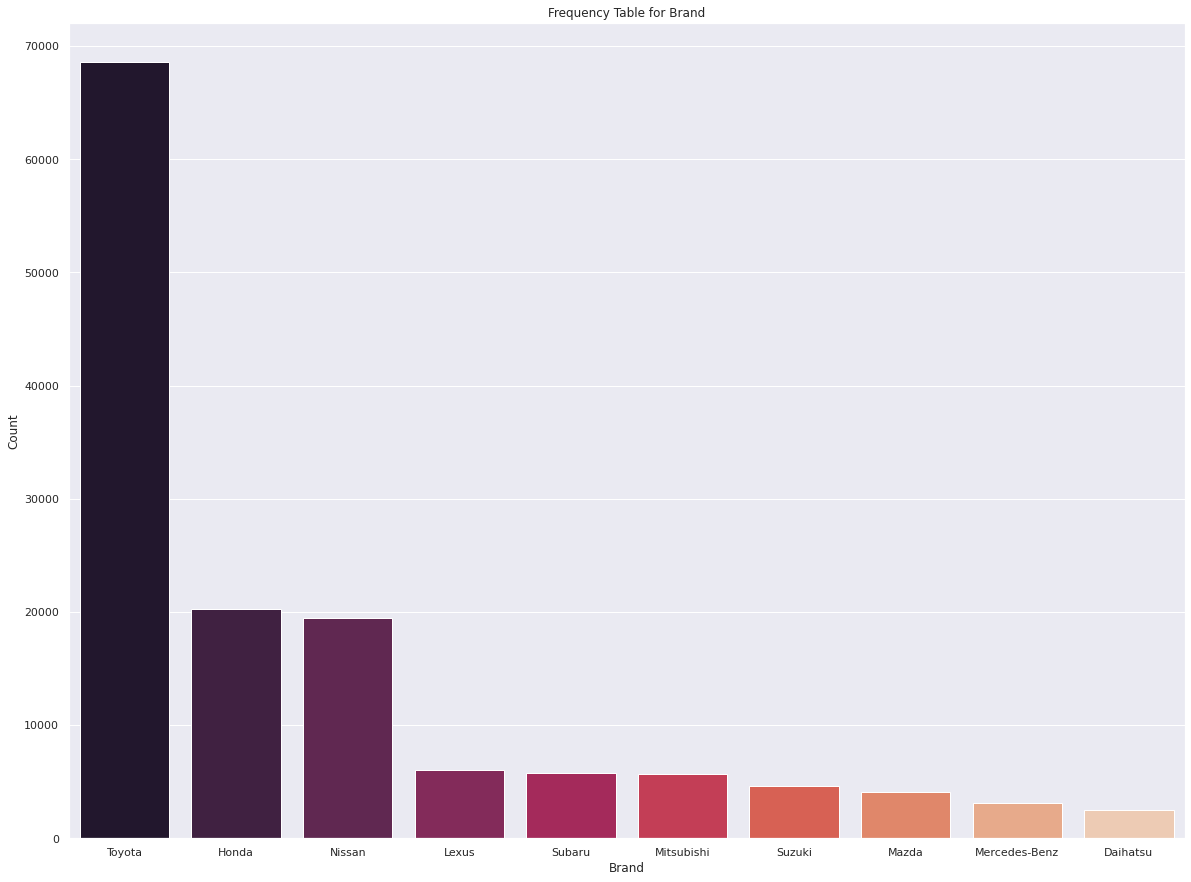

In [122]:
top_10_brands = df_sample['brand'].value_counts().head(10)
sns.set(rc={'figure.figsize':(20,15)})


sns.countplot(x='brand', data=df_sample, order=top_10_brands.index, palette="rocket", orient='v').set_title('Top 10 Car Brands')
plt.xlabel('Brand')
plt.ylabel("Count")
plt.title("Frequency Table for Brand" )
plt.show()

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Text(0.5, 1.0, 'Average Car Horsepower')

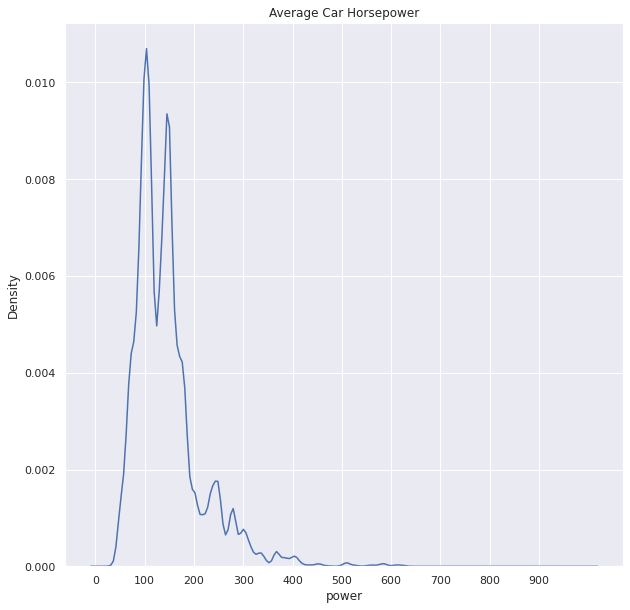

In [124]:
sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(range(0, 1000, 100))
sns.kdeplot(x = 'power',data = df_sample)
plt.title("Average Car Horsepower")

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

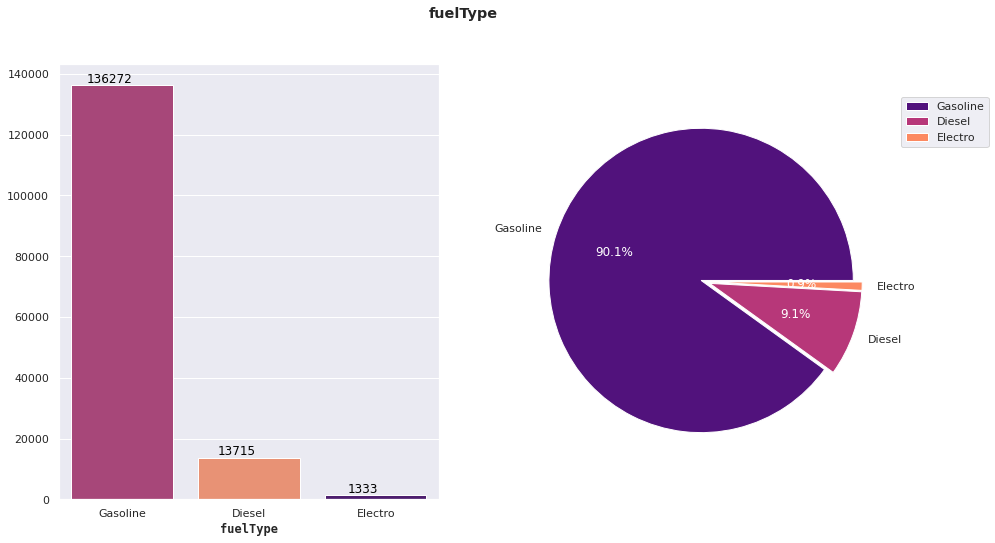

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df_sample['fuelType'].value_counts().index
y=df_sample['fuelType'].value_counts().values.tolist()

data = df_sample.groupby("fuelType").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 

sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])

for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('fuelType', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df_sample['fuelType'].value_counts().index])

for autotext in autotexts:
    autotext.set_color('white')

plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('fuelType',weight = 'bold')
plt.show()

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

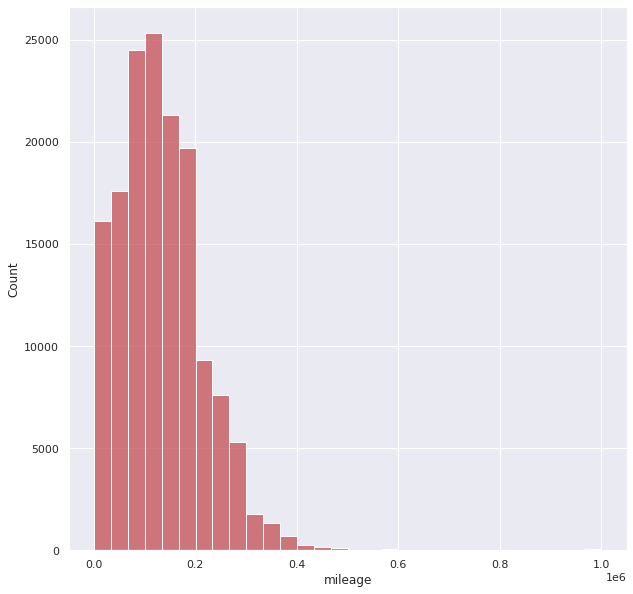

In [83]:
sns.histplot(data=df_sample, x='mileage',bins=30,color = 'r')

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

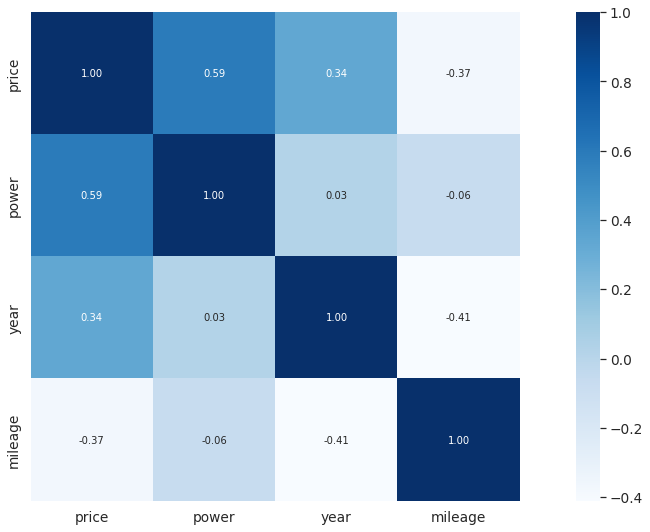

In [94]:
corr = df_sample.corr()
plt.figure(figsize=(20, 9))
k = 18 #number of variables for heatmap
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df_sample[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

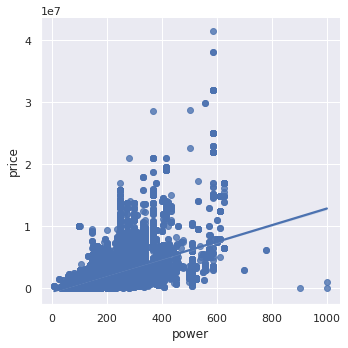

In [85]:
sns.lmplot(data=df_sample,x='power',y='price')

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Text(0.5, 1.0, 'Average Price by Brand')

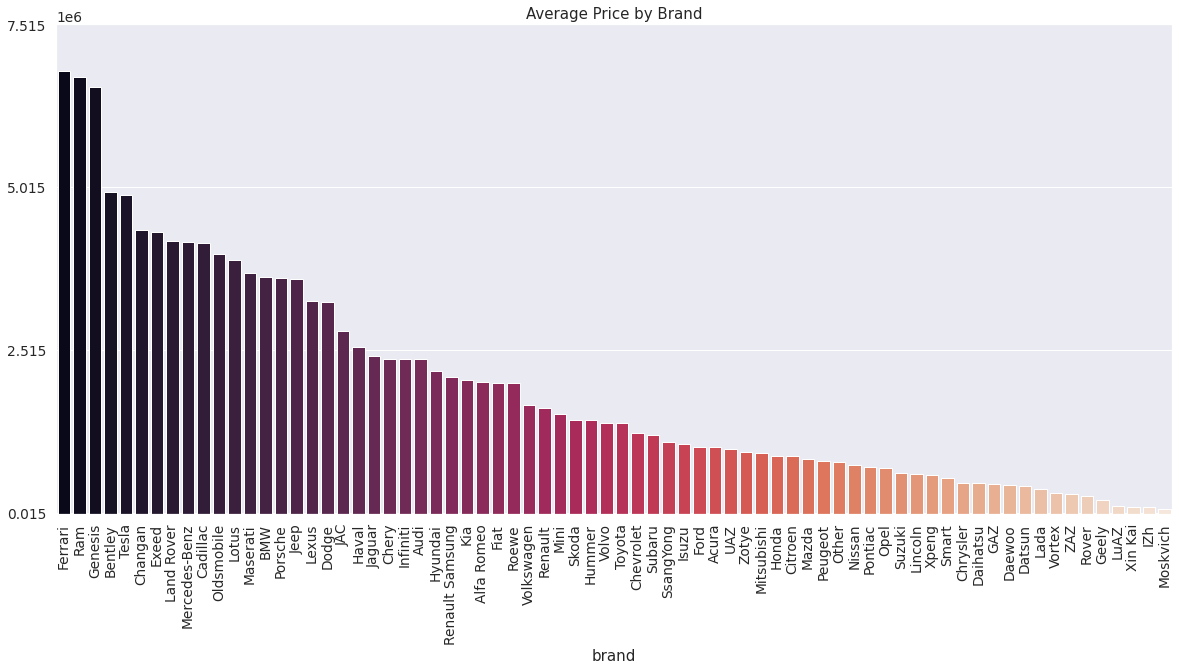

In [117]:
plt.figure(figsize=(20, 9))
# Calculate the average price by brand
avg_price_by_brand = df_sample.groupby('brand')['price'].mean()

# Sort the values in descending order
avg_price_by_brand = avg_price_by_brand.sort_values(ascending=False)

# Create the bar plot
sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values, palette='rocket')

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)
plt.yticks(range(15000, 10000000, 2500000))
# Add a title
plt.title('Average Price by Brand')

In [123]:
avg_price_by_brand.tail()

brand
Geely       215714.285714
LuAZ        124117.411765
Xin Kai     100000.000000
IZh          96666.666667
Moskvich     72823.294118
Name: price, dtype: float64

## Asking and Answering Questions

In this part, we are wish to ask 5 questions and answer through the graph plotted in our EDA



####**1) What is the most popular car brand?**
**ANSWER:** Toyota followed by Honda and Nissan is the top 3 popular car brand chosen.

[Graph 1](#scrollTo=-Scf_lKnVJJ7&line=1&uniqifier=1)- Click Here To Scroll

Tools used:
1.   Seaborn:Plot bar graph
2.   Pandas: Take the top 10 brand
3.   Matplotlib: Title,axis labelling


####**2) What is the average power of a car?**
**ANSWER:** 
Average powers of all cars are between 100 to 200

[Graph 2](#scrollTo=c7fugjWzVJJ7&line=1&uniqifier=1)- Click Here To Scroll

Tools used:
1.   Seaborn:Plot bar chart and pie chart
2.   Panda: Groupby
3.   Matplotlib: plot title axis

####**3) What is the most popular fuel type among the car?**
**ANSWER:** 
Gasoline, Almost 90.1 percent of car use gasoline.

[Graph 3](#scrollTo=kMrm6CiAVJJ8&line=1&uniqifier=1)- Click Here To Scroll

Tools used:
1.   Seaborn:Plot bar graph
2.   Pandas: groupby()
3.   Matplotlib: Title,axis labelling and custome style

####**4) Which factor affect the price of car the most and how does it affect?**
**ANSWER:** 
Car Power.The higher the car power, the higher the price of car

[Graph 4](#scrollTo=My_Q_UY2mwFO&line=1&uniqifier=1)- Click Here To Scroll
[Graph 5](#scrollTo=Zatc4Si_VJJ8&line=1&uniqifier=1)- Click Here To Scroll

Tools used:
1.   Seaborn:Plot heatmap graph and lmplot for correlation between price and power
2.   Pandas: corr()
3.   Matplotlib: Title,axis labelling and custome style

####**5) Which brand has the highest and lowest average price**
**ANSWER:** 

**Top 5 Highest Price Per Sqft**

Top 1 : Ferrari

Top 2 : Ram

Top 3 : Genesis

Top 4 : Bentley

Top 5 : Tesla


**Top 5 Lowest Price Per Sqft**

Top 1 : Moskvich

Top 2 : Izh

Top 3 : Xin Kai 

Top 4 : LuAZ

Top 5 : Geely

[Graph 6](#scrollTo=71GSKec1pCyF&line=6&uniqifier=1)- Click Here To Scroll


Tools used:
1.   Seaborn:Plot bar chart
2.   Pandas: groupby,mean,sort
3.   Matplotlib: Title,axis labelling and custome style, x y tick interval

## Inferences and Conclusion



**Inferences**
1. Japanese car brand like Toyota, Honda and Nissan are the most popular car brand chosen by the customer. This is relevant as they have a strong presence in the global market, with manufacturing and sales operations in multiple countries around the world, which may make it easier for consumers to purchase and service the vehicles.
2. The brand with the highest mean price like Ferrari, Ram and Genesis are considered a luxury brand and associated with higher quality or performance.
3. It is no doubt that Gasoline-powered cars are more common than cars with other fuel types, such as electric or diesels.Gasoline-powered cars may be preferred by consumers due to their availability, affordability, and reliability.

**Conclusion**

We provide these following recommendations to customers based on their intention/interest for buying cars.
1. If you want to buy car that are popular among the society , you can choose the japanese car brand like Toyota,Honda and Nissan.
2. If you want to buy a luxury car, you can choose Ferrari, RAM and Genesis.
3. Gasoline-powered car is the most popular fuel type among cars
4. If you want to buy a cheaper car, you can search for car which has lower car power.

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

Reference: [Kaggle Car Sales Dataset](https://www.kaggle.com/datasets/ekibee/car-sales-information)